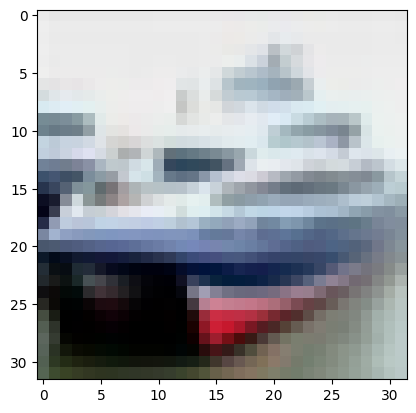

Label: ship


In [30]:
#Dataset
import torch
import torchvision
import torchvision.transforms as transforms # 이미지 변환 툴
from torch.utils.data import DataLoader # 학습 및 배치로 모델에 넣어주기 위한 툴

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Transform 정의
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 256

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)


imshow(images[1])
print(f'Label: {classes[labels[1]]}')

### GrayScale

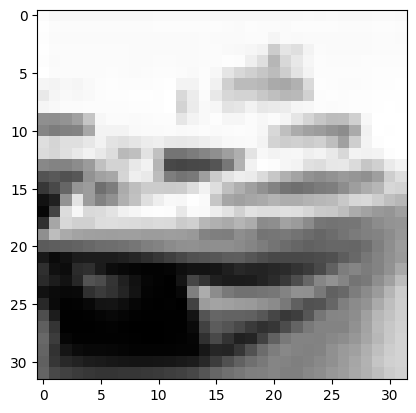

Label: ship


In [35]:
# Transform 정의
gray_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

batch_size = 256

gray_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=gray_transform)
gray_testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.show()

gray_dataiter = iter(gray_testloader)
gray_images, gray_labels = next(gray_dataiter)

imshow(gray_images[1])
print(f'Label: {classes[gray_labels[1]]}')

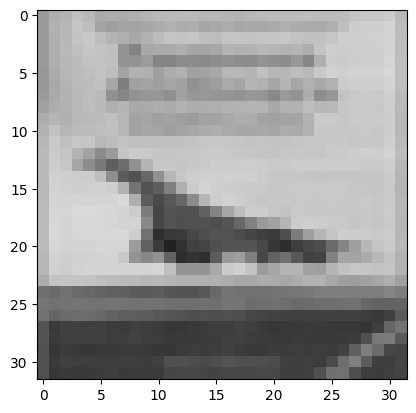

Label: plane


In [72]:
# Define a custom transformation using OpenCV for RGB to HSV conversion
def rgb_to_gray(img):
        img_np = img.numpy().transpose((1, 2, 0))
        img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
        img_gray = np.expand_dims(img_gray, axis=2)
        img_gray = np.concatenate([img_gray] * 3, axis=2)
        img_gray = np.transpose(img_gray, (2, 0, 1))
        return torch.from_numpy(img_gray).float()
    
gray_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
        transforms.Lambda(rgb_to_gray)
    ])

batch_size = 256

gray_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=gray_transform)
gray_testloader = torch.utils.data.DataLoader(gray_testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

gray_dataiter = iter(gray_testloader)
gray_images, gray_labels = next(gray_dataiter)

# Display the RGB image
imshow(gray_images[3])
print(f'Label: {classes[gray_labels[3]]}')

### RGB to YUV (YCbCr)
Y = 밝기
U = 파랑색 - 밝기
V = 빨강색 - 밝기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


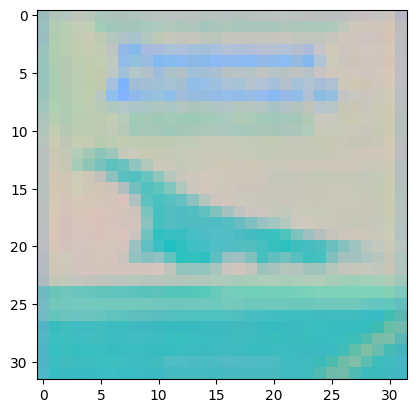

Label: plane


In [71]:
# Define a custom transformation using OpenCV for RGB to HSV conversion
def rgb_to_yuv(img):
    img_np = img.numpy().transpose((1, 2, 0))
    img_yuv = cv2.cvtColor(img_np, cv2.COLOR_RGB2YUV)
    img_yuv = np.transpose(img_yuv, (2, 0, 1))
    return torch.from_numpy(img_yuv).float()

# Transform definition
yuv_transform = transforms.Compose([
    
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.Lambda(lambda img: rgb_to_yuv(img)),
])

batch_size = 256

yuv_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=yuv_transform)
yuv_testloader = torch.utils.data.DataLoader(yuv_testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

yuv_dataiter = iter(yuv_testloader)
yuv_images, yuv_labels = next(yuv_dataiter)

# Display the RGB image
imshow(yuv_images[3])
print(f'Label: {classes[yuv_labels[3]]}')

### RGB to HSV
H : 색상, 색의 종류
S : 채도, 색의 탁하고 선명한 정도
V : 명도, 빛의 밝기.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


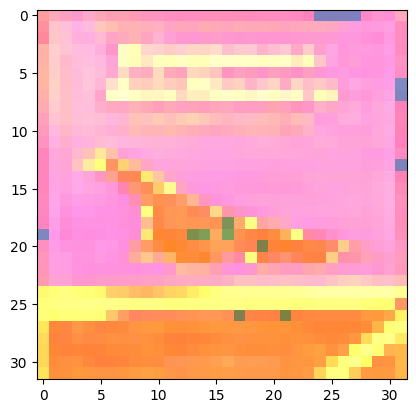

Label: plane


In [70]:
# Define a custom transformation using OpenCV for RGB to HSV conversion
def rgb_to_hsv(img):
    img_np = img.numpy().transpose((1, 2, 0))
    img_hsv = cv2.cvtColor(img_np, cv2.COLOR_RGB2HSV)
    img_hsv = np.transpose(img_hsv, (2, 0, 1))
    return torch.from_numpy(img_hsv).float()

# Transform definition
hsv_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.Lambda(lambda img: rgb_to_hsv(img)),
])

batch_size = 256

hsv_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=hsv_transform)
hsv_testloader = torch.utils.data.DataLoader(hsv_testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

hsv_dataiter = iter(hsv_testloader)
hsv_images, hsv_labels = next(hsv_dataiter)

# Display the RGB image
imshow(hsv_images[3])
print(f'Label: {classes[hsv_labels[3]]}')

### RGB to X-ray

In [66]:
# Define a custom transformation for simulating X-ray effect
def simulate_xray(rgb_image):
    # Convert RGB to BGR (OpenCV uses BGR by default)
    bgr_image = cv2.cvtColor(rgb_image.numpy().transpose((1, 2, 0)), cv2.COLOR_RGB2BGR)

    # Convert the image to grayscale (8-bit unsigned integer)
    grayscale_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(grayscale_image)

    # Stack the equalized image to create a single-channel "X-ray" effect
    equalized_image = np.stack([equalized_image, equalized_image, equalized_image], axis=-1)

    return torch.from_numpy(equalized_image).float().permute(2, 0, 1)

# Transform definition
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.Lambda(lambda img: simulate_xray(img)),
])

batch_size = 256

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow_xray(img_xray, label):
    img_xray = img_xray / 2 + 0.5
    npimg_xray = img_xray.numpy()
    plt.imshow(np.transpose(npimg_xray, (1, 2, 0)))
    plt.title(f'X-ray Simulated Image - Label: {classes[label]}')
    plt.show()

# Display the simulated X-ray image
dataiter = iter(testloader)
images_xray, labels_xray = next(dataiter)

imshow_xray(images_xray[3], labels_xray[3])

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'
